In [1]:
%matplotlib widget

In [2]:
from py4xs.hdf import h5exp,h5xs
import pylab as plt
import numpy as np
import PIL

In [3]:
de = h5exp("exp.h5")

In [20]:
maskS = np.array(PIL.Image.open("/nsls2/data/lix/shared/config/Pilatus/default_mask_SAXS.png"))
maskW = np.array(PIL.Image.open("/nsls2/data/lix/shared/config/Pilatus/default_mask_WAXS2.png"))
de.detectors[0].exp_para.mask.map |= maskS
de.detectors[1].exp_para.mask.map = maskW

In [4]:
dt = h5xs("1898_EC-roi1_0_0.h5", [de.detectors, de.qgrid])

In [5]:
maskS = np.array(PIL.Image.open("/nsls2/data/lix/shared/config/Pilatus/default_mask_SAXS.png"))
maskW = np.array(PIL.Image.open("/nsls2/data/lix/shared/config/Pilatus/default_mask_WAXS2.png"))
dt.detectors[0].exp_para.mask.map |= maskS
dt.detectors[1].exp_para.mask.map = maskW

In [6]:
d2s = dt.get_d2(frn=100)

In [7]:
dd,ee = d2s['_WAXS2'].conv_Iq(de.qgrid, dt.detectors[1].exp_para.mask)

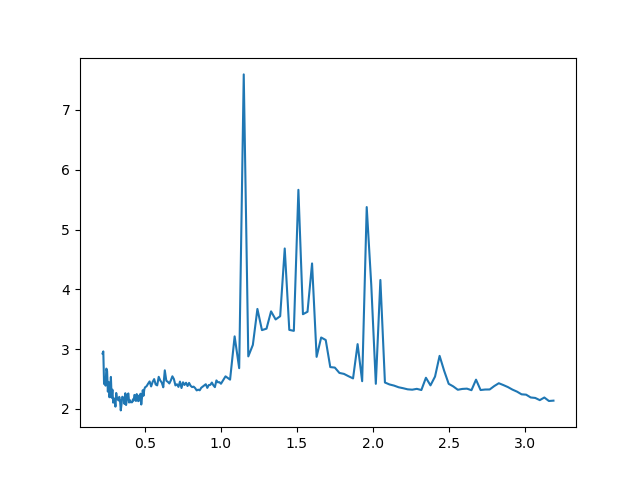

In [8]:
plt.figure()
plt.plot(de.qgrid, dd)

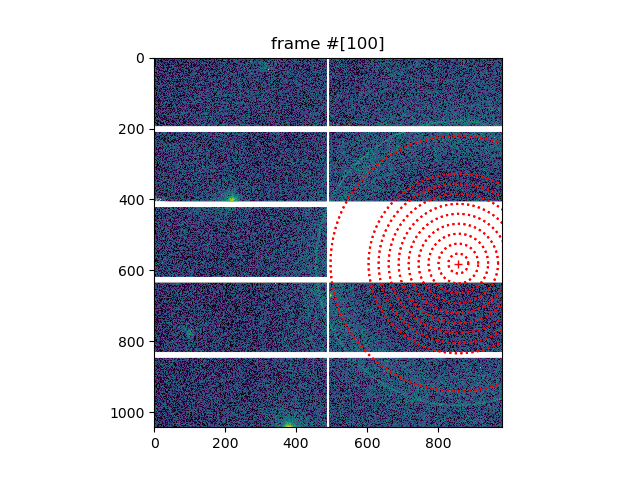

In [9]:
dt.show_data(det_ext="_WAXS2", frn=100, showMask=True)

In [10]:
dt.detectors[1].exp_para.mask.map |= (d2s['_WAXS2'].data.d>500)

In [11]:
dd1,ee1 = d2s['_WAXS2'].conv_Iq(de.qgrid, dt.detectors[1].exp_para.mask)

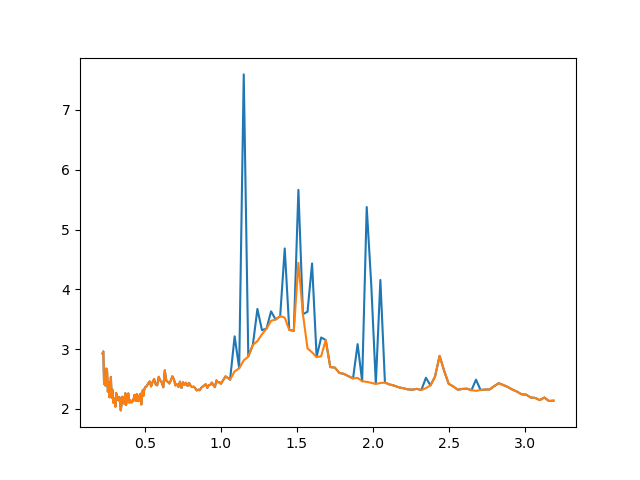

In [12]:
plt.figure()
plt.plot(de.qgrid, dd)
plt.plot(de.qgrid, dd1)